#### 0.Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import statsmodels.api as stm
import scipy.stats as stats
import sklearn
import seaborn as sns

#### 1. Reading data

In [2]:
os.chdir
insurance = pd.read_csv("C://Users//shubh//Downloads//insurance.csv")

In [3]:
insurance.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
835,42,male,35.970,2,no,southeast,7160.33030
807,19,female,36.575,0,no,northwest,2136.88225
1316,19,female,20.600,0,no,southwest,1731.67700
1189,23,female,28.000,0,no,southwest,13126.67745
1245,28,male,24.300,5,no,southwest,5615.36900


In [5]:
insurance.shape

(1338, 7)

In [6]:
corrplt = insurance.corr()

In [7]:
#correlation heat map

#f, ax = plt.subplots(figsize =(8,6)) 
#sns.heatmap(corrplt, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

corrplt.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,bmi,children,charges
age,1,0.11,0.042,0.3
bmi,0.11,1,0.013,0.2
children,0.042,0.013,1,0.068
charges,0.3,0.2,0.068,1


In [10]:
# creating dummy variables for smoker
#catColumns = [‘sex’, ‘smoker’, ‘region’]
data_dum = pd.get_dummies(insurance, columns = ['smoker'], drop_first=True)
data_dum.head()

,age,sex,bmi,children,region,charges,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


#### 2. Objective
##### To predict the charges of insurance based on age
##### Target variable - charges
#####  Explanatory variable - age, bmi

#### 3. Understanding the variable

##### Variable - Charges

In [ ]:
# Histogram of the variable charges

insurance.charges.hist(grid = False, color = 'LightBlue', edgecolor = 'White', bins = 10)
plt.xlabel("Charges of Insurance")
plt.ylabel("No. of holders in a bin")
plt.title("Insurance")
plt.show()

In [ ]:
insurance.boxplot(column="charges", notch=True, vert=False, grid=False)
plt.xlabel("Cost of Insurance")
plt.show()

In [ ]:
insurance["charges"].describe()

##### Variable - Age

In [ ]:
insurance.age.hist(grid=False, color="Orange", edgecolor="White", bins=10)
plt.xlabel("Age of the Insured")
plt.ylabel("No. of people")
plt.title("age")
plt.show()

In [ ]:
insurance.boxplot(column="age", notch=True, grid=False, vert=False)
plt.show()

In [ ]:
insurance["age"].describe()

##### Variable - BMI

In [ ]:
insurance.bmi.hist(grid=False, color="LightBlue", edgecolor="White", bins=10)
plt.xlabel("BMI of the Insured")
plt.ylabel("No. of people")
plt.title("bmi")
plt.show()

In [ ]:
insurance.boxplot(column="bmi", notch=True, grid=False, vert=False)
plt.show()

In [ ]:
insurance["bmi"].describe()

#### 4. Association between target and explanatory variables

In [ ]:
# plotting the scatterplot with age and charges
insurance.plot(kind="Scatter", x="age", y ="charges", color='Blue', figsize=(8,6))
plt.xlabel("Age of the Insured")
plt.ylabel("Charges of the Insurance")
plt.title("Scatterplot of charges against age")
plt.show()

In [ ]:
insurance[['charges','age']].describe()

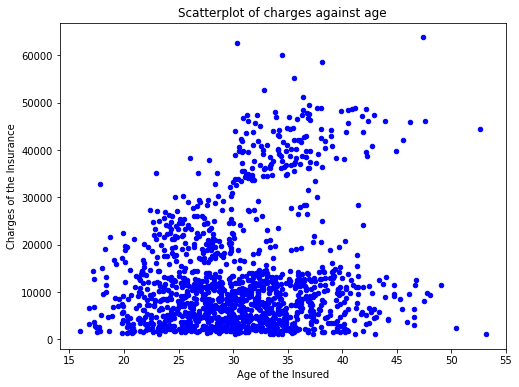

In [11]:
# plotting the scatterplot with bmi and charges
insurance.plot(kind="Scatter", x="bmi", y ="charges", color='Blue', figsize=(8,6))
plt.xlabel("Age of the Insured")
plt.ylabel("Charges of the Insurance")
plt.title("Scatterplot of charges against age")
plt.show()

In [ ]:
insurance[['charges','bmi']].describe()

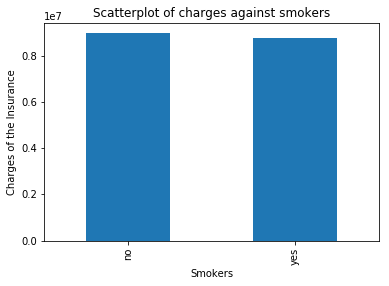

In [18]:
# relation with smoker
#insurance.plot(kind="Scatter", x="smoker_yes", y ="charges", color='Blue', figsize=(8,6))
insurance.groupby(["smoker"])["charges"].sum().plot.bar()
#plt.subplot(2,2,3)
plt.xlabel("Smokers")
plt.ylabel("Charges of the Insurance")
plt.title("Scatterplot of charges against smokers")
plt.show()

##### Notes : Positive association 

#### 5. Splitting train and test data

In [21]:
# Randomly divide the data into training - 70% and test - 30%

#Select 70% of 1338 random numbers without replacement --> 0.70*1338
#using seed to use the same set of random numbers later
np.random.seed(0)
train = np.random.choice(insurance.index, round(0.7*1338), replace=False)
train.sort()
#train

In [28]:
# Selecting observations from the randomised index


X_train = data_dum.loc[train,['age','bmi','smoker_yes']]
Y_train = data_dum.loc[train, 'charges']

# Hence, training data is split

In [23]:
# Now select the indices for test data
# which is the remaining 30% of 1338, observations other than those selected in training data

test = []

for i in list(insurance.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
#test

In [31]:
# We now have the indices for test data
# Select the observations into test 

X_test = data_dum.loc[test,['age','bmi','smoker_yes']]
Y_test = data_dum.loc[test,'charges']

# Hence, we also have the test data ready now

In [ ]:
# checks
print(len(test))
print(len(train))
print(len(train)+len(test))

#### 6. Fitting the Simple Linear Regression Model

In [ ]:
# add_constant() --> adding a column of ones to the data set

In [29]:
X_train = stm.add_constant(X_train)
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,bmi,smoker_yes
0,1.0,19,27.900,1
1,1.0,18,33.770,0
2,1.0,28,33.000,0
3,1.0,33,22.705,0
5,1.0,31,25.740,0


In [30]:
# Find the constants
# OLS method
model = stm.OLS(Y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     998.0
Date:                Tue, 29 Oct 2019   Prob (F-statistic):          1.38e-290
Time:                        11:28:00   Log-Likelihood:                -9455.9
No. Observations:                 937   AIC:                         1.892e+04
Df Residuals:                     933   BIC:                         1.894e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.116e+04   1084.953    -10.287      0.000   -1.33e+04   -9031.778
age          272.8504     13.575     20.099      0.000     246.209     299.492
bmi          286.8132     32.012      8.960      0.000     223.989     349.637
smoker_yes  2.406e+04    480.888     50.035      0.000    2.31e+04     2.5e+04
==============================================================================
Omnibus:                      207.631   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              508.677
Skew:                           1.168   Prob(JB):                    3.48e-111
Kurtosis:                       5.752   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.params

const        -11161.009063
age             272.850379
bmi             286.813244
smoker_yes    24061.210607
dtype: float64

The linear regression line for insurance charges wrt age is
charges = -11161.009063 + 272.850379 * age + 286.813244 * bmi + 24061.210607 * smoker_yes

## write the interpretation

In [39]:
# consider the values of age in train data into an array 

age = np.sort(X_train.age)

In [ ]:
# Plotting the linear regression line

# scatter plot

insurance.plot(kind='scatter', x='age', y='charges', color='lightblue', figsize= (8,6))
plt.xlabel('Age of the insured')
plt.ylabel('Charges of the insurance')
plt.title('Charges - AGE')

# sorted values of age in train data

age = np.sort(X_train.age)

# linear regression line --> predicted values of insurance charges
plt.plot(age, model.params[0] + model.params[1]*age)

plt.show()


#### 7. Making Predictions on test data using the model

In [33]:
# add constant to test data

X_test = stm.add_constant(X_test)
X_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,bmi,smoker_yes
4,1.0,32,28.88,0
7,1.0,37,27.74,0
11,1.0,62,26.29,1
13,1.0,56,39.82,0
23,1.0,34,31.92,1


In [34]:
# Prediction
# Model --> charges = 2724.57 + 263.87 * age

model.predict(X_test)[:10]

4      5853.369527
7      6890.654323
11    37357.245194
13    15539.515500
23    31332.193152
24     6972.396097
25    12887.626389
28      100.797885
29    31769.884022
32     2226.006896
dtype: float64

In [35]:
# storing the predicted values in an array

pred_charges = model.predict(X_test)

In [36]:
# actual Values of charges(Y) from test data

Y_test[:10]

4      3866.85520
7      7281.50560
11    27808.72510
13    11090.71780
23    37701.87680
24     6203.90175
25    14001.13380
28     2775.19215
29    38711.00000
32     4687.79700
Name: charges, dtype: float64

#### 8. Checking the accuracy

In [37]:
# error = actual - predicted

e = Y_test - pred_charges
np.mean(e)

39.299740409220334

In [38]:
# calculating the RSS

#e**2

rss  = np.sum(e**2)
rss

17646567456.59315

In [ ]:
#rmse
import math

math.sqrt(sum(e**2)/(len(Y_test)-2))